# CNN

The spatial structure in an image is not well captured when flattening the image pixels to a vector.  

* Advantages of CNN
    * Fewer parameters in the model
    * Invariant to object distortions and orientations
    * Automatically learn the features and structures

* Convoluional Layer
    * Filters
    * Feature maps
* Pooling Layer - Downsizes the feature maps
* Fully connected Layer - Flattened feedword neural network

###  Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Data Preparation

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
## Make sure images have shape (28, 28, 1)#
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
#print("x_train shape:", x_train.shape)
#print(x_train.shape[0], "train samples")
#print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout



model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
#model.add(Dense(units=32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 1.2454 - accuracy: 0.8284 - val_loss: 0.1156 - val_accuracy: 0.9668
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1900 - accuracy: 0.9438 - val_loss: 0.0776 - val_accuracy: 0.9759
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1407 - accuracy: 0.9575 - val_loss: 0.0555 - val_accuracy: 0.9823
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1171 - accuracy: 0.9646 - val_loss: 0.0532 - val_accuracy: 0.9832
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1013 - accuracy: 0.9681 - val_loss: 0.0474 - val_accuracy: 0.9866
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0920 - accuracy: 0.9719 - val_loss: 0.0514 - val_accuracy: 0.9857
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0831 - accuracy: 0.9738 - val_loss: 0.0460 - val_accuracy: 0.9866

In [5]:
from matplotlib import pyplot as plt
def plot_acc_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')

    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

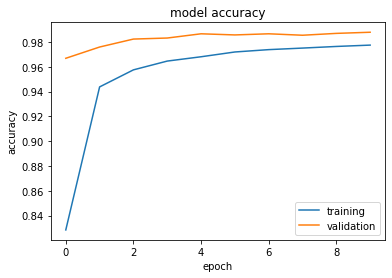

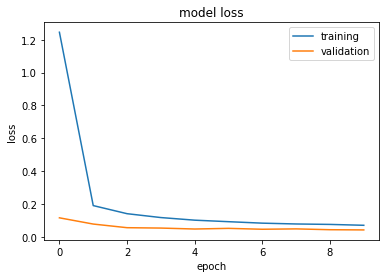

In [6]:
plot_acc_loss(history)

### Evaluate the model

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0417492501437664
Test accuracy: 0.987500011920929


## Vision models

- You can build and train your model and do hyper parameter optimization
- Transfer learning. Take the existing pre-trained models and apply to your case. 

### We saw that CNN is good at capturing the structure and pattern in the dataset. Can we apply CNN to other domains like NLP? 